In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [3]:
df = pd.read_csv('Position_CSV/DB_stacked.csv')
df.head()

,name,approximate_value,games.x,AVp16,X1,adjusted_yards_per_attempt,assists_on_tackles,completed_passes,extra_points_made,field_goals_made,...,total_touchdowns,two_point_conversions,weight,yards_from_scrimmage,yards_from_scrimmage_per_play,yards_recovered_from_fumble,yards_returned_from_interceptions,yards_returned_per_interception,year,X
0,Hamza Abdullah,5,48,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,Career
1,Husain Abdullah,21,97,3.463918,Career,NaN,80.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,172.0,17.2,NaN,NaN
2,Kenneth Acker,7,40,2.800000,Career,NaN,30.0,NaN,0.0,0.0,...,2.0,NaN,195.0,NaN,NaN,0.0,102.0,14.6,NaN,NaN
3,Anthony Adams,37,121,4.892562,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,106.0,21.2,NaN,Career
4,Jahleel Addae,24,96,4.000000,Career,NaN,155.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,0.0,74.0,9.3,NaN,NaN


In [4]:
df.drop(['name', 'approximate_value', 'games.x', 'X1', 'height', 'player_id', 'position', 'team_abbreviation', 'season', 'year', 'X'], axis=1, inplace=True)

In [5]:
df.fillna(0, inplace=True)

In [6]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['assists_on_tackles', 'fumbles_forced', 'fumbles_recovered', 'fumbles_recovered_for_touchdown', 'interceptions', 'interceptions_returned_for_touchdown', 'other_touchdowns', 'passes_defended', 'plays_from_scrimmage', 'points', 'sacks', 'safeties', 'solo_tackles', 'tackles_for_loss', 'total_tackles', 'total_touchdowns', 'yards_recovered_from_fumble', 'yards_returned_from_interceptions', 'yards_returned_per_interception']])
Y = np.asarray(df['AVp16'])
                  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  0.06403834058409585
Weights:  [-1.44336110e-03  1.20742507e-01 -2.96747680e-02 -2.34861855e-01
  6.73508414e-02  3.71991765e-01  1.73472348e-18 -2.05994500e-02
 -2.55766469e-03  7.81073175e-03  5.97866642e-02  9.54097912e-18
 -1.33312267e-03  9.92293875e-03 -2.77648377e-03  1.30178862e-03
 -1.90385264e-03 -5.51822681e-04 -1.43240137e-02]


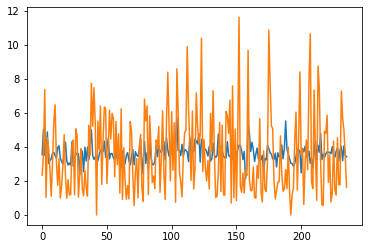

In [7]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['other_touchdowns', 'safeties', 'yards_returned_from_interceptions']])
Y = np.asarray(df['AVp16'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  0.005296608234650724
Weights:  [0.         0.         0.00338353]


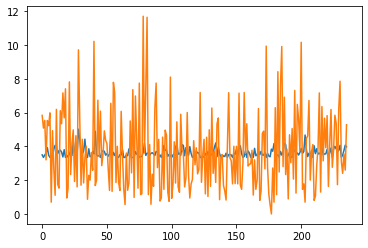

In [9]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  0.005296609184678447
Weights:  [0.         0.         0.00338353]


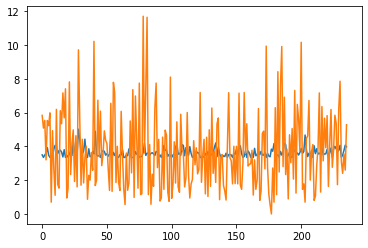

In [10]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [11]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
0.001057999223648499
[0.00000000e+00 2.00577402e-20 3.10661354e-03]

Ridge Regression
0.0008545495618528007
[0.         0.         0.00314594]
